In [1]:
import numpy as np
from featuremaker import *
from sklearn.svm import LinearSVC

In [26]:
addr = 'INRIAPerson/train_64x128_H96'
addr_ = 'INRIAPerson/test_64x128_H96'

poshists_train = np.array(makehist_positive_norm('train', number = 2000))
#poshists_train_hog = np.array(makehist_positive_norm(addr, 'HOG'))

neghists_train = np.array(makehist_negative('Train', number = 2000))
#neghists_train_hog = np.array(makehist_negative('Train', 'HOG'))

poshists_test = np.array(makehist_positive_norm('train', number = 2000))
#poshists_test_hog = np.array(makehist_positive_norm(addr_, 'HOG'))

neghists_test = np.array(makehist_negative('Test', number = 2000))
#neghists_test_hog = np.array(makehist_negative('Test', 'HOG'))

####################################################################

poshists_train = poshists_train.reshape(poshists_train.shape[0], poshists_train.shape[1])
#poshists_train_hog = poshists_train.reshape(poshists_train_hog.shape[0], poshists_train.shape[1])

neghists_train = neghists_train.reshape(neghists_train.shape[0], neghists_train.shape[1])
#neghists_train_hog = neghists_train.reshape(neghists_train_hog.shape[0], neghists_train.shape[1])

poshists_test = poshists_test.reshape(poshists_test.shape[0], poshists_test.shape[1])
#poshists_test_hog = poshists_test.reshape(poshists_test_hog.shape[0], poshists_test.shape[1])

neghists_test = neghists_test.reshape(neghists_test.shape[0], neghists_test.shape[1])
#neghists_test_hog = neghists_test.reshape(neghists_test_hog.shape[0], neghists_test.shape[1])

npos =  poshists_train.shape[0]
nneg =  neghists_train.shape[0]

X_train = np.vstack((poshists_train, neghists_train))
#X_train_hog = np.vstack((poshists_train_hog, neghists_train_hog))

Y_train = np.zeros(npos + nneg)
Y_train[:npos] = 1

In [27]:
npos_ = poshists_test.shape[0]
nneg_ = neghists_test.shape[0]

X_test = np.vstack((poshists_test, neghists_test))
Y_test = np.zeros(npos_ + nneg_)
Y_test[:npos_] = 1

In [28]:
X_test.shape

(4000, 7980)

In [29]:
X_train_hog = X_train[:,:3780]
X_test_hog = X_test[:,:3780]

In [30]:
clf = LinearSVC(random_state=0, tol=1e-2)
clf.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.01, verbose=0)

In [31]:
clf.score(X_test, Y_test)

1.0

In [32]:
clf_hog = LinearSVC(random_state=0, tol=1e-2)
clf_hog.fit(X_train_hog, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.01, verbose=0)

In [33]:
clf_hog.score(X_test_hog, Y_test)

1.0

In [34]:
X_train_hog.shape

(4000, 3780)

In [12]:
Y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

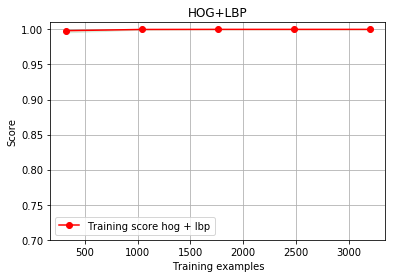

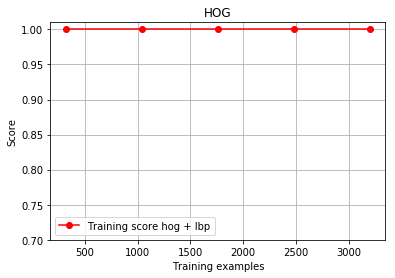

In [35]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator,  title, X,  y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
             label="Training score hog + lbp")
    
    
    

    plt.legend(loc="best")
    return plt

title = "HOG+LBP"
title2 = "HOG"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf,  title, X_train, Y_train, (0.7, 1.01), cv)
plot_learning_curve(clf_hog, title2, X_train_hog, Y_train, (0.7, 1.01), cv)

plt.show()

In [71]:
plt.savefig('file.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(100):
    clf.fit(X_train, Y_train, ma)